In [3]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
from vega_datasets import data

 <span style="font-family : New York Times; font-size: 1em; color : green">
 Altair exposes a Python API for building statistical visualizations that follows Vega-Lite syntax.

In [5]:
a = {
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": True,
  "age": 27,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
    {
      "type": "mobile",
      "number": "123 456-7890"
    }
  ],
  "children": [],
  "spouse": 0
}

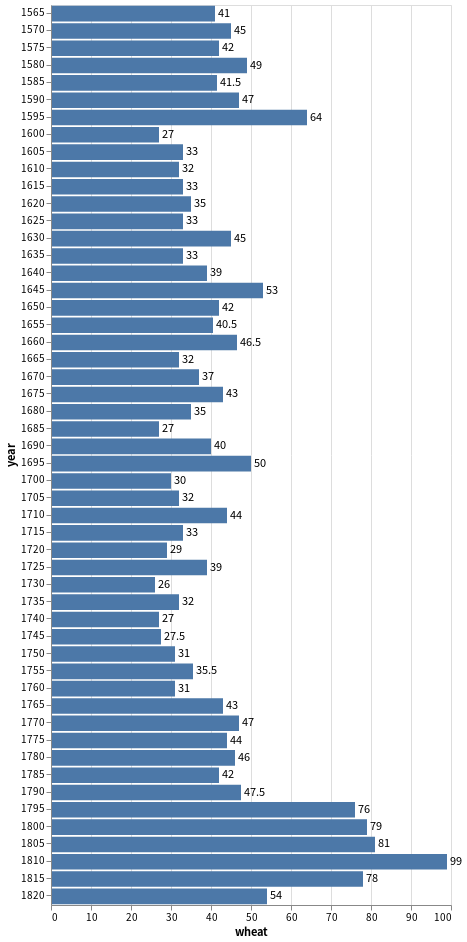

In [6]:
source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    x='wheat:Q',
    y="year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='wheat:Q'
)

(bars + text).properties(height=900)

In [ ]:
source

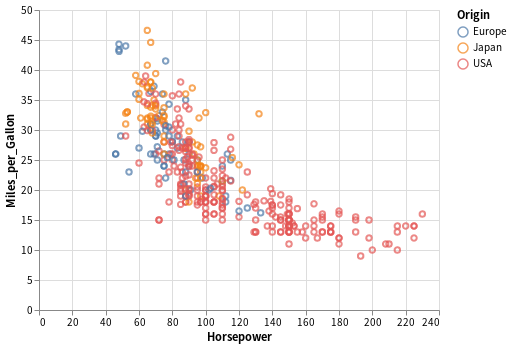

In [7]:
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

In [ ]:
source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

In [ ]:
source

In [ ]:
highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(source).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines